# TP Apprentissage Supervisé : Classification binaire

### POITEVIN LOUIS

### NUM ETUDIANT : 11410541

# Listing import

In [9]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from matplotlib.ticker import PercentFormatter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

warnings.filterwarnings('ignore')

# I. Apprentissage supervisé : Feature engineering et Classification

## 1) Chargement des données et préparation (Question 1)

### Import jeu de données

In [10]:
df_credit = pd.read_csv('./credit_scoring.csv', sep=';')
df_credit.head(10)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1
5,1.0,0.0,60.0,36.0,0.0,1.0,0.0,75.0,214.0,3500.0,0.0,650.0,1645.0,1
6,29.0,0.0,60.0,44.0,0.0,1.0,0.0,75.0,125.0,10000.0,0.0,1600.0,1800.0,1
7,9.0,1.0,12.0,27.0,1.0,1.0,0.0,35.0,80.0,0.0,0.0,200.0,1093.0,1
8,0.0,0.0,60.0,32.0,0.0,1.0,1.0,90.0,107.0,15000.0,0.0,1200.0,1957.0,1
9,0.0,1.0,48.0,41.0,0.0,1.0,1.0,90.0,80.0,0.0,0.0,1200.0,1468.0,0


### Info sur les données

In [11]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seniority  4375 non-null   float64
 1   Home       4375 non-null   float64
 2   Time       4375 non-null   float64
 3   Age        4375 non-null   float64
 4   Marital    4375 non-null   float64
 5   Records    4375 non-null   float64
 6   Job        4375 non-null   float64
 7   Expenses   4375 non-null   float64
 8   Income     4375 non-null   float64
 9   Assets     4375 non-null   float64
 10  Debt       4375 non-null   float64
 11  Amount     4375 non-null   float64
 12  Price      4375 non-null   float64
 13  Status     4375 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 478.6 KB


On observe que les donnéés sont tous en format float donc on pourrait penser qu'il n'ya pas de variable catégorielle. Or, on observe que parmis elles il y'a des variables binaires comme "Jobs" ou "Marital" qui sont donc bien des variables catégorielles.

In [12]:
df_credit.describe()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
count,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000
mean,7.985143,0.528229,46.518857,37.021714,0.271086,1.172114,0.364114,55.595200,130.848914,5298.431314,342.551543,1037.463771,1459.732343,0.722057
std,8.173922,0.499260,14.619282,10.973187,0.444571,0.377523,0.481236,19.451569,86.199518,10582.377366,1217.622800,469.753531,621.775995,0.448036
min,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000,0.000000
25%,2.000000,0.000000,36.000000,28.000000,0.000000,1.000000,0.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1116.500000,0.000000
50%,5.000000,1.000000,48.000000,36.000000,0.000000,1.000000,0.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000,1.000000
75%,12.000000,1.000000,60.000000,45.000000,1.000000,1.000000,1.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1688.000000,1.000000
max,48.000000,1.000000,72.000000,68.000000,1.000000,2.000000,1.000000,173.000000,959.000000,250000.000000,30000.000000,4500.000000,11140.000000,1.000000


<AxesSubplot:>

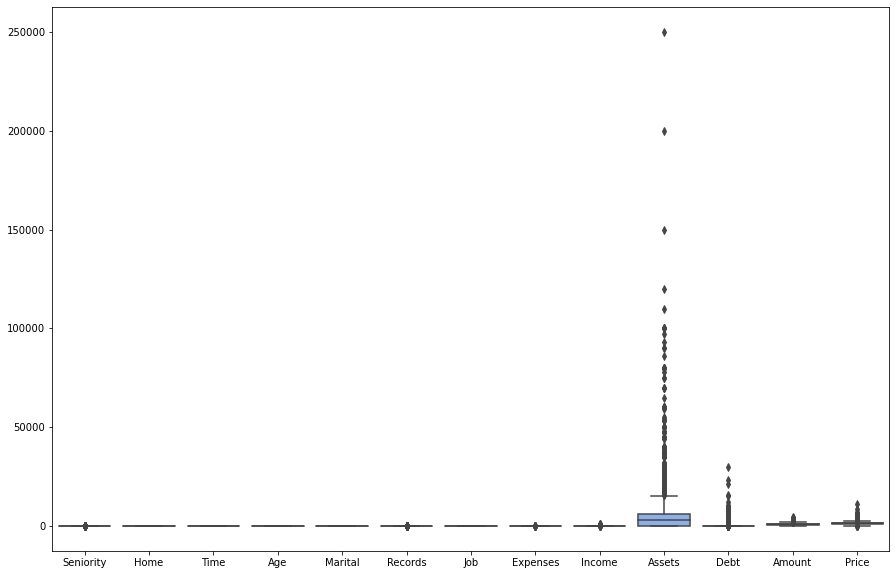

In [14]:
fig,ax = plt.subplots()
fig.set_size_inches(15,10,5)
sns.boxplot(data=df_credit.iloc[:,:-1])


Suite a ce plot, nous visualisons une disparité d'echelle entre les données. Face a ce cas, il est envisageable de normaliser les données pour améliorer les scores d'algorithmes.

### Transformation du jeu de donnée 

In [6]:
X_credit = df_credit.iloc[:, :-1].values
Y_credit = df_credit.iloc[:,-1].values

In [15]:
Y_credit

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,

In [7]:
print("Taille echantillon : "+str(np.shape(X_credit)))

Taille echantillon : (4375, 13)


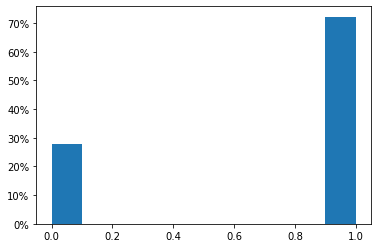

In [16]:
plt.hist(Y_credit,weights=np.ones(len(Y_credit)) / len(Y_credit))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

Nous observons un déséquilibre entre les proportions avec environ 30% de mauvais payeurs et 70% de bons payeurs. Le but ici est de savoir si notre modèle établi sera efficace pour déterminer les mauvais payeurs. Une simple mesure d'accuracy ne sera ici donc pas efficace. (Par exemple, un modèle naif qui asignerai a chaque client le label "Bon payeur" par défaut aurait avec ses données un résultat supérieur a 70% en terme d'accuracy). Il nous faudra une autre métrique que l'accucary qui permet de déterminer l'efficacité de notre modèle a détecter les mauvais payeurs.


### Split train test set

In [17]:
def splitData(X_credit,Y_credit,test_size=0.5,random_state=1):
    X_credit_train, X_credit_test, Y_credit_train, Y_credit_test = train_test_split(X_credit, Y_credit, test_size=test_size, random_state=1)
    return X_credit_train, X_credit_test, Y_credit_train, Y_credit_test

# 2) Apprentissage et évaluation de modèles 

### Dans ce qui suit, on considerera que ce que nous désignons par label positifs sont les labels=0, c'est à dire les mauvais payeurs.

* TP: (0,0) : "le client est prédit mauvais payeur et il en est un"
* TN: (1,1) : "Le client est prédit bon payeur et il est un"
* FP: (1,0) : "Le client est prédit mauvais payeur alors que c'est un bon payeur"
* FN: (0,1) : "Le client est prédit bon payeur alors que c'est un mauvais payeur"

## A) CART and KKN standard (Question 2)

### Split Data

In [18]:
X_credit_train, X_credit_test, Y_credit_train, Y_credit_test = splitData(X_credit,Y_credit)

### CART

#### Create and fit the model CART

In [19]:
treeCart = DecisionTreeClassifier(random_state=1)
treeCart.fit(X_credit_train,Y_credit_train)

DecisionTreeClassifier(random_state=1)

In [20]:
Y_predict_cart = treeCart.predict(X_credit_test)

#### Métriques CART

##### 1) Accuracy

In [23]:
treeCart.score(X_credit_test, Y_credit_test)
Y_credit_test

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,

Bien que l'accuracy ne soit pas une métrique adaptée au problème, on peut voir que le modèle ne performe pas plus mal que le modèle naif qui donnerait des 1 à tout le monde. 

##### 2) Confusion matrixes, recall and precision

On affiche la confusion matrix, afin d'avoir une idée de la performance de notre algorithme

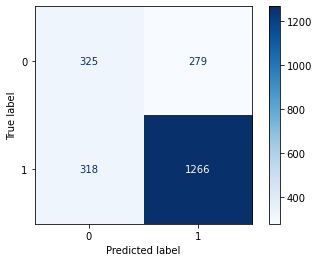

In [14]:
display_confusion_matrix_cart= plot_confusion_matrix(treeCart, X_credit_test, Y_credit_test, cmap=plt.cm.Blues, normalize=None)

Une grande majorité de bon payeurs ont été correctement classifiés. Concernant les mauvais payeurs, comme attendu, ils sont plus difficiles à détecter.

##### Recall

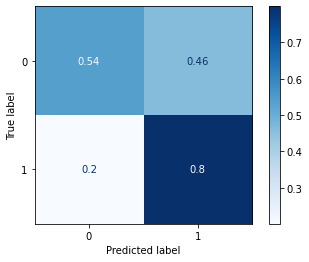

In [15]:
display_confusion_matrix_cart= plot_confusion_matrix(treeCart, X_credit_test, Y_credit_test, cmap=plt.cm.Blues, normalize='true')

Le recall permet de calculer la proportion de bon ou mauvais payeur prédits: 

In [16]:
from sklearn.metrics import recall_score
recall_score_credit = recall_score(Y_credit_test,Y_predict_cart)
print("La proportion de bons payeurs correctement prédit:", recall_score_credit)


La proportion de bons payeurs correctement prédit: 0.7992424242424242


In [17]:
recall_score_credit = recall_score(Y_credit_test,Y_predict_cart,pos_label=0)
print("La proportion de mauvais payeurs correctement prédit:", recall_score_credit)

La proportion de mauvais payeurs correctement prédit: 0.5380794701986755


###### Precision

Precision : Il permet de connaître la faculté de notre modèle à avoir la bonne prédiction sur chaque label

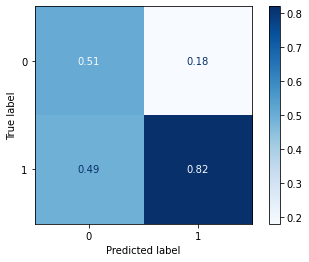

In [18]:
display_confusion_matrix_cart= plot_confusion_matrix(treeCart, X_credit_test, Y_credit_test, cmap=plt.cm.Blues, normalize='pred')

On observe que pour une prediction de mauvais payeurs, le modèle a 54% de probabilité d'avoir eut raison de l'étiquetter ainsi.

In [19]:
from sklearn.metrics import average_precision_score,precision_score
precision_credit = precision_score(Y_credit_test, Y_predict_cart)
print("La probabilité que la prédiction soit vraie pour le bon payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le bon payeur est: 0.8194174757281554


In [20]:
precision_credit = precision_score(Y_credit_test, Y_predict_cart, pos_label=0)
print("La probabilité que la prédiction soit vraie pour le mauvais payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le mauvais payeur est: 0.505443234836703


#### Interprétations des métriques

Quand les faux négatifs sont importants, il est préférable de favoriser le recall
Sinon on prend la précision.

Comme les données sont déséquilibrés en faveur des bons payeurs, la précision et le recall concernant les bons payeurs ne sont pas des énormes gages de performance. 

En revanche, comme il y a peu de mauvais payeurs, la précision et le recall concernant les mauvais payeurs sont importantes. On voit que notre modèle est capable de prédire plus de 50% des mauvais payeurs et prédit les mauvais payeurs avec une justesse à également supérieur 50%, ce qui nous montre que notre modèle a quand même réussi a décerner des patterns dans les données des mauvais payeurs. 

De manière général, je pense que la précision des mauvais payeurs est la métrique la plus importante. En effet, on veut pas cataloguer un client comme mauvais payeur alors qu'il était en fait pas un. Maintenant, si on se place que du coté de la banque, le recall est important si on veut a tout prix éviter d'accorder un prêt à un mauvais payeur. 

##### F1 Score

On peut donc faire une sorte "moyenne" entre recall- precision pour les mauvais payeurs: 

In [21]:
from sklearn.metrics import f1_score
f1_score_cart = f1_score(Y_credit_test,Y_predict_cart,pos_label=0)
f1_score_cart

0.5212510024057739

### KNN

#### Create and fit the model K  neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_credit = KNeighborsClassifier(n_neighbors=5)
neighbor_credit.fit(X_credit_train, Y_credit_train)

Y_neighbor_predict = neighbor_credit.predict(X_credit_test)

#### Métriques KNN

##### 1) Accuracy

In [23]:
neighbor_credit.score(X_credit_test,Y_credit_test)

0.7248628884826326

##### 2) Confusion matrixes , recall, precision

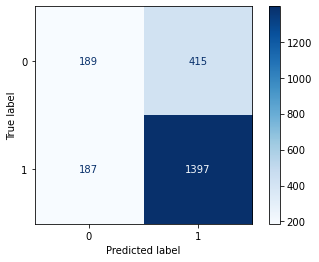

In [24]:
display_confusion_matrix_neighbor= plot_confusion_matrix(neighbor_credit, X_credit_test, Y_credit_test, cmap=plt.cm.Blues, normalize=None)

##### Recall

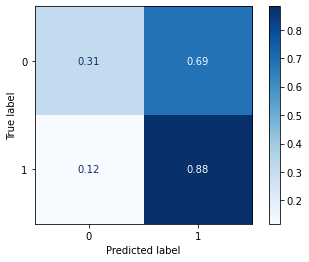

In [25]:
display_confusion_matrix_neighbor= plot_confusion_matrix(neighbor_credit, X_credit_test, Y_credit_test, cmap=plt.cm.Blues, normalize='true')

In [26]:
recall_score_credit = recall_score(Y_credit_test,Y_neighbor_predict)
print("La proportion de bons payeurs correctement prédit:", recall_score_credit)

La proportion de bons payeurs correctement prédit: 0.8819444444444444


In [27]:
recall_score_credit = recall_score(Y_credit_test,Y_neighbor_predict,pos_label=0)
print("La proportion de mauvais payeurs correctement prédit:", recall_score_credit)

La proportion de mauvais payeurs correctement prédit: 0.3129139072847682


###### Precision

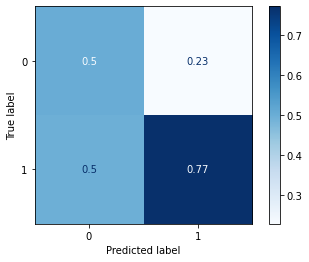

In [28]:
display_confusion_matrix_neighbor= plot_confusion_matrix(neighbor_credit, X_credit_test, Y_credit_test, cmap=plt.cm.Blues, normalize='pred')

In [29]:
precision_credit = precision_score(Y_credit_test, Y_neighbor_predict)
print("La probabilité que la prédiction soit vraie pour le bon payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le bon payeur est: 0.7709713024282561


In [30]:
precision_credit = precision_score(Y_credit_test, Y_neighbor_predict, pos_label=0)
print("La probabilité que la prédiction soit vraie pour le mauvais payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le mauvais payeur est: 0.5026595744680851


##### 3) F1-Score

In [31]:
f1_score_knn = f1_score(Y_credit_test,Y_neighbor_predict,pos_label=0)
f1_score_knn

0.3857142857142857

### Comparaison CART et KNN

On remarque que KNN a de moins bonne performances par rapport à nos critères. Meme si KNN a une meilleur rappel pour les bons payeurs, il a un rappel nettement moins bon pour les mauvais payeurs. En d'autres termes, KNN est moins bon pour détecter les mauvais payeurs parmis ceux identifiés, il va avoir tendance à accorder des crédits à des mauvais payeurs.
En ce qui concerne la précision, les scores sont à peu près similaire. 

## B) CART and KNN with normalized data (Question 3)

### Normalizing data with StandardScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def normalizeData(X_credit, minmax=False):
    if minmax :
        scaler = MinMaxScaler()
        X_credit_norm = scaler.fit_transform(X_credit)
        return X_credit_norm
    else :
        scaler_cart = StandardScaler()
        X_credit_norm = scaler_cart.fit_transform(X_credit)
        return X_credit_norm
        

In [33]:
X_credit_norm = normalizeData(X_credit, minmax=False)

### Split Data

In [34]:
X_credit_norm_train, X_credit_norm_test, Y_credit_train, Y_credit_test = splitData(X_credit_norm,Y_credit)


### CART

#### Create and fit the model CART

In [35]:
treeCart = DecisionTreeClassifier(random_state=1)
treeCart.fit(X_credit_norm_train,Y_credit_train)

Y_predict_cart = treeCart.predict(X_credit_norm_test)

#### Métriques CART

##### 1) Accuracy

In [36]:
treeCart.score(X_credit_norm_test, Y_credit_test)

0.7257769652650823

##### 2) Confusion matrixes, recall and precision

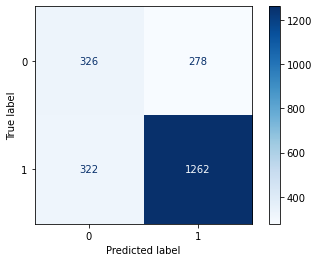

In [37]:
display_confusion_matrix_cart= plot_confusion_matrix(treeCart, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize=None)

##### Recall

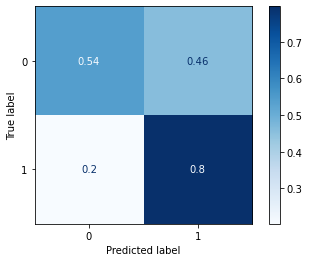

In [38]:
display_confusion_matrix_cart= plot_confusion_matrix(treeCart, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize='true')

In [39]:
recall_score_credit = recall_score(Y_credit_test,Y_predict_cart)
print("La proportion de bons payeurs correctement prédit:", recall_score_credit)

La proportion de bons payeurs correctement prédit: 0.7967171717171717


In [40]:
recall_score_credit = recall_score(Y_credit_test,Y_predict_cart,pos_label=0)
print("La proportion de mauvais payeurs correctement prédit:", recall_score_credit)

La proportion de mauvais payeurs correctement prédit: 0.5397350993377483


##### Precision

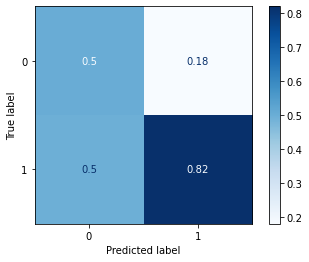

In [41]:
display_confusion_matrix_cart= plot_confusion_matrix(treeCart, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize='pred')

In [42]:
precision_credit = precision_score(Y_credit_test, Y_predict_cart)
print("La probabilité que la prédiction soit vraie pour le bon payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le bon payeur est: 0.8194805194805195


In [43]:
precision_credit = precision_score(Y_credit_test, Y_predict_cart, pos_label=0)
print("La probabilité que la prédiction soit vraie pour le mauvais payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le mauvais payeur est: 0.5030864197530864


##### F1-Score

In [44]:
f1_score_cart = f1_score(Y_credit_test,Y_predict_cart,pos_label=0)
f1_score_cart

0.5207667731629393

#### Comparaison avec les résultats sans normalization

On voit ici aucune différence, peu importe le type de nromalization effectué. Peut être que l'algorithme du CART est indépendant des normalizations des données ? Ce serait logique, pusique les Decision Trees se basent sur le "splittage" des données en deux , donc tant que l'ordre n'est pas chamboulé, l'échelle des valeurs ne devraient pas jouer de rôles 

### KNN

#### Create and fit the model K  neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_credit = KNeighborsClassifier(n_neighbors=5)
neighbor_credit.fit(X_credit_norm_train, Y_credit_train)

Y_neighbor_predict = neighbor_credit.predict(X_credit_norm_test)

#### Métriques KNN

##### 1) Accuracy

In [46]:
neighbor_credit.score(X_credit_norm_test,Y_credit_test)

0.7541133455210237

##### 2) Confusion matrixes, recall and precision

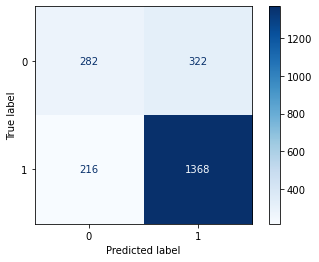

In [47]:
display_confusion_matrix_neighbor= plot_confusion_matrix(neighbor_credit, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize=None)

##### Recall

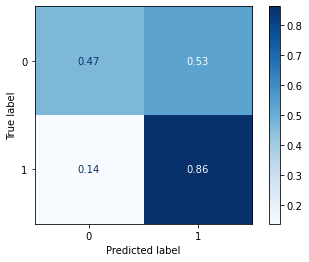

In [48]:
display_confusion_matrix_neighbor= plot_confusion_matrix(neighbor_credit, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize='true')

In [49]:
recall_score_credit = recall_score(Y_credit_test,Y_neighbor_predict)
print("La proportion de bons payeurs correctement prédit:", recall_score_credit)

La proportion de bons payeurs correctement prédit: 0.8636363636363636


In [50]:
recall_score_credit = recall_score(Y_credit_test,Y_neighbor_predict,pos_label=0)
print("La proportion de mauvais payeurs correctement prédit:", recall_score_credit)

La proportion de mauvais payeurs correctement prédit: 0.46688741721854304


##### Precision

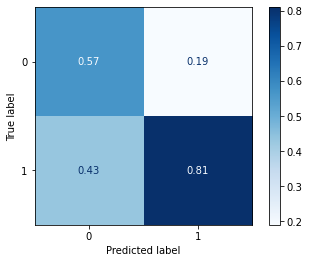

In [51]:
display_confusion_matrix_neighbor= plot_confusion_matrix(neighbor_credit, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize='pred')

In [52]:
precision_credit = precision_score(Y_credit_test, Y_neighbor_predict)
print("La probabilité que la prédiction soit vraie pour le bon payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le bon payeur est: 0.8094674556213017


In [53]:
precision_credit = precision_score(Y_credit_test, Y_neighbor_predict, pos_label=0)
print("La probabilité que la prédiction soit vraie pour le mauvais payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le mauvais payeur est: 0.5662650602409639


##### F1 Score

In [54]:
f1_score_knn = f1_score(Y_credit_test,Y_neighbor_predict,pos_label=0)
f1_score_knn

0.5117967332123413

#### Comparaison avec KNN sans normalization

On voit ici que normaliser les données augmente considérablement le score de recall pour les mauvais payeurs, arrivant ainsi à des résultats similaires à l'algorithme CART, dans les deux cas de normalizations. Avec un recall un peu plus bas (47% vs 54% pour CART), mais une precision encore plus grande (57% vs 51% pour CART). Si on s'interesse à la detection coute que coute des mauvais payeurs, alors on preferera utiliser CART, sinon, on utilisera KNN.
Ainsi, l'algorithme KNN semble beaucoup plus sensible à la normalization des données. Puisque la même notion de distance est utlilisée pour toutes les données, il semble important que les differents attributs soient à la même échelle.



## C) CART and KNN with normalized, and PCA data (Question 4)

In [55]:
X_credit_norm = normalizeData(X_credit,False)

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_3D = pca.fit_transform(X_credit_norm)

new_df_credit = pd.concat([df_credit,pd.DataFrame(X_3D)],axis=1)
X_credit_norm_pca = np.concatenate((X_credit_norm,X_3D),axis=1)

### Split Data

In [57]:
X_credit_norm_train, X_credit_norm_test, Y_credit_train, Y_credit_test = splitData(X_credit_norm_pca,Y_credit)

### CART

#### Create and fit the model CART

In [58]:
treeCart = DecisionTreeClassifier(random_state=1)
treeCart.fit(X_credit_norm_train,Y_credit_train)
Y_predict_cart = treeCart.predict(X_credit_norm_test)

#### Métriques CART

##### 1) Accuracy

In [59]:
treeCart.score(X_credit_norm_test, Y_credit_test)

0.7212065813528337

##### 2) Confusion matrixes, recall, precision

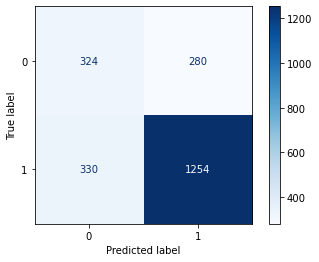

In [60]:
display_confusion_matrix_cart= plot_confusion_matrix(treeCart, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize=None)

##### Recall

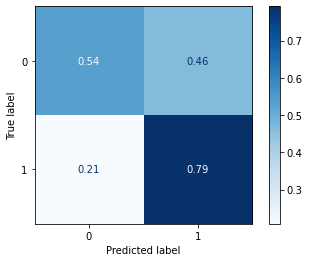

In [61]:
display_confusion_matrix_cart= plot_confusion_matrix(treeCart, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize='true')

In [62]:
recall_score_credit = recall_score(Y_credit_test,Y_predict_cart)
print("La proportion de bons payeurs correctement prédit:", recall_score_credit)

La proportion de bons payeurs correctement prédit: 0.7916666666666666


In [63]:
recall_score_credit = recall_score(Y_credit_test,Y_predict_cart,pos_label=0)
print("La proportion de mauvais payeurs correctement prédit:", recall_score_credit)

La proportion de mauvais payeurs correctement prédit: 0.5364238410596026


##### Precision

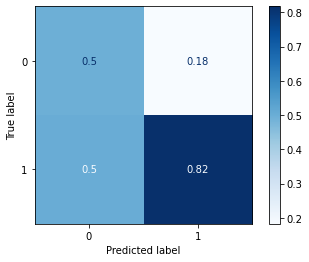

In [64]:
display_confusion_matrix_cart= plot_confusion_matrix(treeCart, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize='pred')

In [65]:
precision_credit = precision_score(Y_credit_test, Y_predict_cart)
print("La probabilité que la prédiction soit vraie pour le bon payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le bon payeur est: 0.817470664928292


In [66]:
precision_credit = precision_score(Y_credit_test, Y_predict_cart, pos_label=0)
print("La probabilité que la prédiction soit vraie pour le mauvais payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le mauvais payeur est: 0.4954128440366973


##### 3) F1-Score

In [67]:
f1_score_cart = f1_score(Y_credit_test,Y_predict_cart,pos_label=0)
f1_score_cart

0.5151033386327504

### KNN

#### Create and fit the model K  neighbors

In [68]:
neighbor_credit = KNeighborsClassifier(n_neighbors=5)
neighbor_credit.fit(X_credit_norm_train, Y_credit_train)

KNeighborsClassifier()

In [69]:
Y_neighbor_predict = neighbor_credit.predict(X_credit_norm_test)

#### Métriques KNN

##### 1) Accuracy

In [70]:
neighbor_credit.score(X_credit_norm_test,Y_credit_test)

0.7600548446069469

##### 2) Confusion matrixes, recall and precision

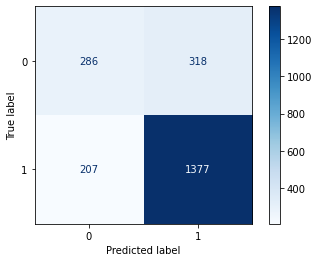

In [71]:
display_confusion_matrix_neighbor= plot_confusion_matrix(neighbor_credit, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize=None)

##### Recall

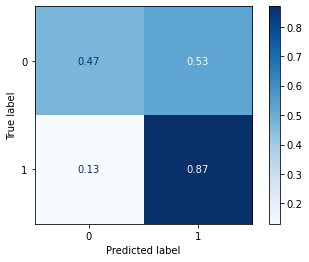

In [72]:
display_confusion_matrix_neighbor= plot_confusion_matrix(neighbor_credit, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize='true')

In [73]:
recall_score_credit = recall_score(Y_credit_test,Y_neighbor_predict)
print("La proportion de bons payeurs correctement prédit:", recall_score_credit)

La proportion de bons payeurs correctement prédit: 0.8693181818181818


In [74]:
recall_score_credit = recall_score(Y_credit_test,Y_neighbor_predict,pos_label=0)
print("La proportion de mauvais payeurs correctement prédit:", recall_score_credit)

La proportion de mauvais payeurs correctement prédit: 0.4735099337748344


##### precision

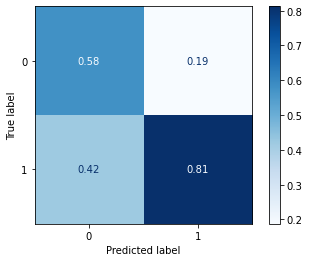

In [75]:
display_confusion_matrix_neighbor= plot_confusion_matrix(neighbor_credit, X_credit_norm_test, Y_credit_test, cmap=plt.cm.Blues, normalize='pred')

In [76]:
precision_credit = precision_score(Y_credit_test, Y_neighbor_predict)
print("La probabilité que la prédiction soit vraie pour le bon payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le bon payeur est: 0.8123893805309734


In [77]:
precision_credit = precision_score(Y_credit_test, Y_neighbor_predict, pos_label=0)
print("La probabilité que la prédiction soit vraie pour le mauvais payeur est:",precision_credit)

La probabilité que la prédiction soit vraie pour le mauvais payeur est: 0.5801217038539553


##### F1 Score

In [78]:
f1_score_knn = f1_score(Y_credit_test,Y_neighbor_predict,pos_label=0)
f1_score_knn

0.5214220601640838

### Comparaison PCA 

On observe encore une fois des résultats similaire. La PCA n'a pas améliorer les résultats.

##  D) Variables Selection with Random Forest (Question 5)

In [79]:
X_credit_norm = normalizeData(X_credit,False)

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_3D = pca.fit_transform(X_credit_norm)

new_df_credit = pd.concat([df_credit,pd.DataFrame(X_3D)],axis=1)
del new_df_credit['Status']
X_credit_norm_pca = np.concatenate((X_credit_norm,X_3D),axis=1)

In [81]:
X_credit_norm_train, X_credit_norm_test, Y_credit_train, Y_credit_test = splitData(X_credit_norm_pca,Y_credit)

### Affichage de l'improtances des variables

Index([   'Income', 'Seniority',           1,           2,     'Price',
          'Amount',           0,       'Age',    'Assets',   'Records',
        'Expenses',       'Job',      'Time',      'Debt',      'Home',
         'Marital'],
      dtype='object')


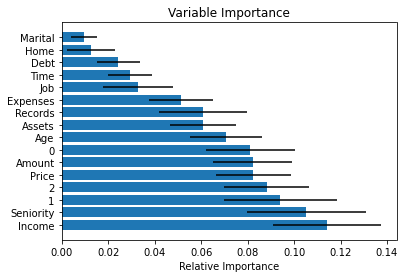

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_credit_norm_train,Y_credit_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = new_df_credit.columns
print(features[sorted_idx])
padding = np.arange(X_credit_norm_train.size/len(X_credit_norm_train)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

### Nombre de variables à conserver pour un résultat optimal

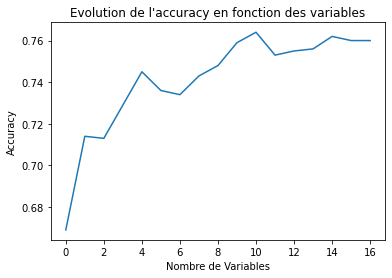

In [83]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_credit_norm_train.shape[1]+1)
for f in np.arange(0, X_credit_norm_train.shape[1]+1):
     X1_f = X_credit_norm_train[:,sorted_idx[:f+1]]
     X2_f = X_credit_norm_test[:,sorted_idx[:f+1]]
     KNN.fit(X1_f,Y_credit_train)
     YKNN=KNN.predict(X2_f)
     scores[f]=np.round(accuracy_score(Y_credit_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

### Creation d'un nouveau dataset 

On garde les septs premières meilleures variables pour un score le plus optimal sur notre modèle

In [84]:
nombre_variables_optimales=np.argmax(scores)
nombre_variables_optimales

10

In [85]:
best_features=features[sorted_idx[:nombre_variables_optimales]]

X_credit_best_features=np.array(new_df_credit[best_features])

X_credit_norm_best_features = normalizeData(X_credit_best_features)

X_credit_features_train, X_credit_features_test, Y_credit_train, Y_credit_test  = splitData(X_credit_norm_best_features,Y_credit, test_size=0.5)

## D)  Grid Search Hyperparameters tuning (Question 6)

Pour effectuer le GridSearch, il faut déjà se demander qu'elle est la métrique qui nous permettra d'évaluer notre modèle et de selectionner les meilleurs hyperparamètres. 

Pour cette section, on se placera du coté de la banque, c'est à dire qu'on se dira qu'on veut maximiser la détection de mauvais payeurs, quitte à cataloguer des bons payeurs comme mauvais payeurs. En effet, on partira du principe, que les clients désignés comme mauvais payeurs par l'algorithme pourront toujours etre sujets a des plus d'investigation de la banque, pour voir si le modèle se sont trompés sur leurs cas.


Dans ce cas, on choisira le recall comme métrique par rapport au label "mauvais payeur". Si on veut par contre, éviter de vexer un client en l'accusant à tort d'être un mauvais payeur, on privilégiera la précision pour le label 0. Ce sera notre deuxième critère.

In [86]:
from sklearn.metrics import make_scorer, precision_score, f1_score, recall_score, accuracy_score

In [5]:
from sklearn.model_selection import GridSearchCV

def Grid_Search(model, parameters, X_credit, Y_credit, scoring = accuracy_score ):
    
    custom_scorer= make_scorer(scoring, greater_is_better=True, pos_label=0)

    testParametersDT = GridSearchCV(model, parameters, scoring=custom_scorer)
    grid_fit = testParametersDT.fit(X_credit,Y_credit)
    best_model=  grid_fit.best_estimator_
    
    return best_model
    

NameError: name 'accuracy_score' is not defined

### CART

##### GridSearch  pour CART

In [88]:
DTclassifier = DecisionTreeClassifier(random_state=1)
parameters_cart = {'criterion': ['gini','entropy'],'max_depth': range(1,20)}
best_DTclassifier=Grid_Search(DTclassifier, parameters_cart, X_credit_features_train, Y_credit_train, scoring= f1_score)

In [89]:
# Best Model
best_DTclassifier

DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=1)

In [90]:
# Predictions
best_predictions_cart=best_DTclassifier.predict(X_credit_features_test)

###### 1) Accuracy

In [91]:
accuracy_score_cart=accuracy_score(Y_credit_test, best_predictions_cart)
accuracy_score_cart

0.7070383912248629

##### 2) Confusion Matrix, recall and precision

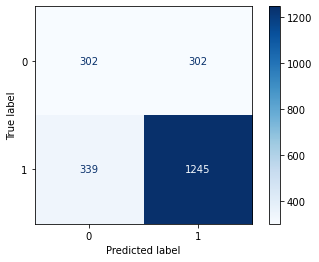

In [92]:
display_confusion_matrix_cart= plot_confusion_matrix(best_DTclassifier, X_credit_features_test, Y_credit_test, cmap=plt.cm.Blues, normalize=None)

##### Recall

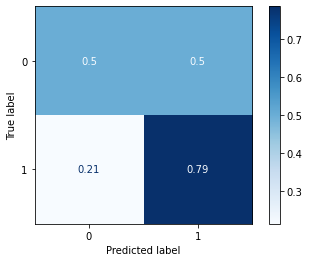

In [93]:
display_confusion_matrix_cart= plot_confusion_matrix(best_DTclassifier, X_credit_features_test, Y_credit_test, cmap=plt.cm.Blues, normalize='true')

###### Precision

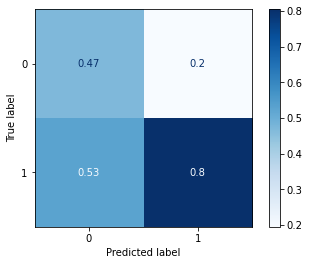

In [94]:
display_confusion_matrix_cart= plot_confusion_matrix(best_DTclassifier, X_credit_features_test, Y_credit_test, cmap=plt.cm.Blues, normalize='pred')

###### F1 Score

In [95]:
f1_score(Y_credit_test, best_predictions_cart, pos_label=0)

0.485140562248996

###### Interpretations des resultats

Pour la detection de mauvais payeurs, en prenant f1_score comme score à maximiser à la place de recall, on obtient le même resultat que recall  (57%) avec un meilleur resultat pour la precision (49%). Les resultats trouves sont meilleurs que dans les precedentes analyses avec des arbres de decisions.

### KNeighbors

##### GridSearch

In [96]:
KNNclassifier = KNeighborsClassifier()
parameters_knn = {"n_neighbors": [2*n+1 for n in range(1,150)]}
best_KNNclassifier=Grid_Search(KNNclassifier, parameters_knn, X_credit_features_train,Y_credit_train, scoring=precision_score)


In [97]:
# Best Model
best_KNNclassifier

KNeighborsClassifier(n_neighbors=271)

In [98]:
# Predictions
best_predictions_KNN = best_KNNclassifier.predict(X_credit_features_test)


##### 1) Accuracy

In [99]:
accuracy_score_KNN=accuracy_score(Y_credit_test, best_predictions_KNN)
accuracy_score_KNN

0.7550274223034735

##### 2) Confusion matrix and recal, precision

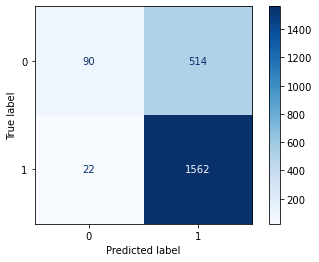

In [100]:
plot_confusion_matrix(best_KNNclassifier, X_credit_features_test, Y_credit_test, cmap=plt.cm.Blues, normalize=None)

###### Recall

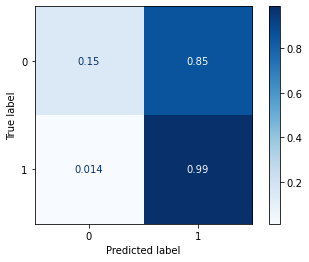

In [101]:
plot_confusion_matrix(best_KNNclassifier, X_credit_features_test, Y_credit_test, cmap=plt.cm.Blues, normalize='true')

###### Precision 

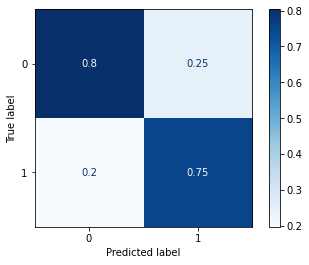

In [102]:
plot_confusion_matrix(best_KNNclassifier, X_credit_features_test, Y_credit_test, cmap=plt.cm.Blues, normalize='pred')

###### f1 score

In [103]:
f1_score(Y_credit_test, best_predictions_KNN, pos_label=0)

0.25139664804469275

Ici, la GridSearch ne permet pas beaucoup d'augmenter le modèle par rapport au recall des mauvais payeurs. La GRidSearch est par contre très intéressantes concernant la precision pour les mauvais payeurs: on arrive a 80% de precision. Ceci est au detriment du recall, qui descend a 15%. On voit ici une illustration du trade off entre recall et precision.

On conclut toujours que ce modèle est le moins bon par rapport à nos métriques fixées plus haut.

## Création d'un pipeline (Question 7)

#### Concatenation de la reduction de dimensions issue de la PCA

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import make_pipeline


# On créer un Pipeline PCA, qui créer 3 nouvelles composantes à partir des attributs existants.
#le deuxieme model kernel_pca n'est pas utilisé en soit, mais comme un artifice pour ajouter les nouvelles composantes.
pca = PCA(n_components = 3)
pipePCA = FeatureUnion([('pca', pca), ('kernel_pca',PCA())])

#### Vérification du pipe PCA

In [105]:
np.shape(pipePCA.fit_transform(X_credit_train,Y_credit_train))

(2187, 16)

#### Création d'un pipe Normalizer-PCA-DecisionTreeClassifier

In [106]:
pipe = Pipeline([('normalizer', StandardScaler())
                 , ('pca', pipePCA)
                 ,('dtclassifier',DecisionTreeClassifier(random_state=1))])

parameters_pipe=dict(normalizer=['passthrough'],
                    pca=['passthrough'],
                    dtclassifier__criterion= ['gini', 'entropy'],
                    dtclassifier__max_depth=range(1,20))

In [107]:
#create own metric
custom_scorer= make_scorer(f1_score, greater_is_better=True, pos_label=0)

##### Grid Search over the pipeline

In [108]:
grid_search_pipe=GridSearchCV(pipe, param_grid=parameters_pipe, scoring=custom_scorer)

In [109]:
grid_search_fit = grid_search_pipe.fit(X_credit_features_train,Y_credit_train)
best_pipeline=grid_search_fit.best_estimator_
best_score=grid_search_fit.best_score_
print(best_pipeline)

Pipeline(steps=[('normalizer', 'passthrough'), ('pca', 'passthrough'),
                ('dtclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=17,
                                        random_state=1))])


In [110]:
print("la f1-score du Pipeline est", best_score)

la f1-score du Pipeline est 0.4963438397281227


#### Sauvegarde du pipeline dans un pickle

In [111]:
import pickle

saved_model = pickle.dumps(best_pipeline)

#### Test de réutilisation 

In [112]:
model2 = pickle.loads(saved_model)

On a pu sauver et reutiliser (via pickle) le pipeline qui effectue la transformation des donnees et qui entraine le modele d'arbre de decisions qui a ete au prealable definit par le GridSearch. On ne röaffiche pas son scoring recall/precision, puisqu'il a ete deja fait plus haut.

## Comparaison de plusieurs algorithmes d’apprentissage (Question 8)

### Create and fit the model Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score,precision_score
from sklearn.model_selection import cross_val_score
import time

In [114]:
parameters_adaboost = {'n_estimators': [50, 100]}

clfs = {
 'BAYES' : GaussianNB(),
 'CART': DecisionTreeClassifier(criterion="gini"),
 'ID3': DecisionTreeClassifier(criterion="entropy"),
 'STUMP':DecisionTreeClassifier(max_depth=1),
 'MLP':MLPClassifier(hidden_layer_sizes=(20,10)),
 'KNN': KNeighborsClassifier(n_neighbors=5),
 'BAGGING': BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50),
 'ADABOOST': AdaBoostClassifier(n_estimators=50, random_state=1),
 'RF': RandomForestClassifier(n_estimators=50, random_state=1), 
 'ADABOOST_OPTIMIZED' : GridSearchCV(AdaBoostClassifier(), param_grid=parameters_adaboost, scoring= make_scorer(f1_score, pos_label=0), refit='precision')
}

Cross Validations: Ceci permet de spliter Training/Test les donnes de facons differents afin de capturer la diversites des donnes.

In [115]:
def run_classifiers(clfs,X_credit,Y_credit, X_credit_train, Y_credit_train, X_credit_test=None , Y_credit_test=None, cv=None,pos_label=0):
    
    # Initialisation cross validation
    if cv != None :
        print("Cross validation :",cv)
        print("\r\n")
        print("Pos_label :", pos_label)
        print("\r\n")
        kf = KFold(n_splits=cv, shuffle=True, random_state=0)
        for i in clfs:
            # Ajout du modele
            clf = clfs[i]
            # Start du temps
            start = time.time()
            # Calcul de la precision 
            precision = cross_val_score(clf,X_credit, Y_credit, cv=kf, scoring=make_scorer(precision_score, pos_label=pos_label))
            # Calcul du scoring
            cv_acc = cross_val_score(clf, X_credit, Y_credit, cv=kf)
            # Calcul de AUC sous la courbe ROC
            roc = cross_val_score(clf, X_credit, Y_credit, cv=kf, scoring = 'roc_auc')
            # Calcul du rappel
            recall = cross_val_score(clf, X_credit, Y_credit, cv=kf, scoring=make_scorer(recall_score, pos_label=pos_label))
            # Fin du temps
            end = time.time()
            # Description resultat
            print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
            print("AUC ROC for {0} is {1:3f} +/- {2:.3f}".format(i,np.mean(roc),np.std(roc)))
            print("Recall for {0} is {1:3f} +/- {2:.3f}".format(i,np.mean(recall),np.std(recall)))
            print("Precision for {0} is {1:3f} +/- {2:.3f}".format(i,np.mean(precision),np.std(precision)))
            print("Time elapsed : "+str(end-start)+" seconds")
            print("\r\n")
    else:
        print("No cross validation")
        for i in clfs:
            # Ajout du modele
            clf = clfs[i]
            # Start du temps
            start = time.time()
            clf = clf.fit(X_credit_train,Y_credit_train)
            Y_pred = clf.predict(X_credit_test)
            scoreAcc = accuracy_score(Y_credit_test,Y_pred)
            scoreRoc = roc_auc_score(Y_credit_test,Y_pred)
            scoreRecall = recall_score(Y_credit_test, Y_pred, pos_label=pos_label)
            scorePrecision = precision_score(Y_credit_test,Y_pred, pos_label=pos_label)
            # Fin du temps
            end = time.time()
            # Description resultat
            print("Accuracy for {0} is: {1}".format(i, scoreAcc))
            print("AUC ROC for {0} is {1}".format(i,scoreRoc))
            print("Recall for {0} is {1}".format(i,scoreRecall))
            print("Precision for {0} is {1}".format(i,scorePrecision))
            print("Time elapsed : "+str(end-start)+" seconds")
            print("\r\n")

     

        
        
       

##### Effet du parametre K sur l'algorithme KNN

In [116]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_credit_train, Y_credit_train)
    y_pred = knn.predict(X_credit_test)
    scores.append(f1_score(Y_credit_test, y_pred, pos_label=0))

Text(0.5, 1.0, 'F1-Scoring KNN en fonction du parametre K')

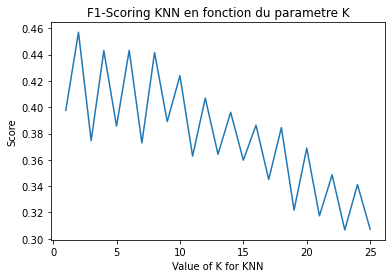

In [117]:
# allow plots to appear within the notebook
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Score')
plt.title('F1-Scoring KNN en fonction du parametre K')

On voit que lorsque K grandit, le score semble devenit plus bas. On voit que la parité ou imparité du paramètre K semble jouer un rôle important. Il semble que les K pairs rendent le modèle plus performant que les K impairs.

##### Effet du parametre N_estimator sur l'algorithme RandomForest

In [118]:
n_range = range(1, 100)
scores = []

for k in n_range:
    rf =RandomForestClassifier(n_estimators=k, random_state=1)
    rf.fit(X_credit_train, Y_credit_train)
    y_pred = rf.predict(X_credit_test)
    scores.append(f1_score(Y_credit_test, y_pred, pos_label=0))


Text(0.5, 1.0, 'F1-Scoring RandomForest en fonction du parametre n_estimator')

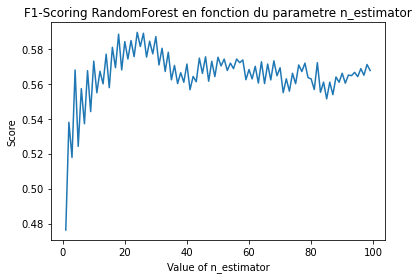

In [119]:
# allow plots to appear within the notebook
%matplotlib inline

plt.plot(n_range, scores)
plt.xlabel('Value of n_estimator')
plt.ylabel('Score')
plt.title('F1-Scoring RandomForest en fonction du parametre n_estimator')

Comme attendu, augmenter le nombre de modèles a assembler augmente les performances de la classification jusqu'a un certain seuil.

### Différents classifiers comparaisons

In [ ]:
run_classifiers(clfs,X_credit,Y_credit, X_credit_train, Y_credit_train,X_credit_test, Y_credit_test,cv=10)

Cross validation : 10


Pos_label : 0


Accuracy for BAYES is: 0.772 +/- 0.022
AUC ROC for BAYES is 0.790916 +/- 0.026
Recall for BAYES is 0.534379 +/- 0.036
Precision for BAYES is 0.603472 +/- 0.063
Time elapsed : 0.14161968231201172 seconds


Accuracy for CART is: 0.723 +/- 0.031
AUC ROC for CART is 0.655411 +/- 0.031
Recall for CART is 0.499493 +/- 0.062
Precision for CART is 0.506664 +/- 0.060
Time elapsed : 0.7596943378448486 seconds


Accuracy for ID3 is: 0.720 +/- 0.020
AUC ROC for ID3 is 0.660849 +/- 0.026
Recall for ID3 is 0.514500 +/- 0.043
Precision for ID3 is 0.495373 +/- 0.048
Time elapsed : 0.9623703956604004 seconds


Accuracy for STUMP is: 0.722 +/- 0.018
AUC ROC for STUMP is 0.618080 +/- 0.028
Recall for STUMP is 0.120532 +/- 0.149
Precision for STUMP is 0.200730 +/- 0.248
Time elapsed : 0.13771796226501465 seconds


Accuracy for MLP is: 0.729 +/- 0.040
AUC ROC for MLP is 0.715901 +/- 0.036
Recall for MLP is 0.475053 +/- 0.253
Precision for MLP is 0.598426 +/- 0.081
Ti

## Interpretation

* Une courbe ROC trace les valeurs taux de VP et de FP pour différents seuils de classification. Diminuer la valeur du seuil de classification permet de classer plus d'éléments comme positifs, ce qui augmente le nombre de faux positifs et de vrais positifs.

* AUC signifie "aire sous la courbe ROC". Cette valeur mesure l'intégralité de l'aire à deux dimensions située sous l'ensemble de la courbe ROC (par calculs d'intégrales) de (0,0) à (1,1).

* L'AUC fournit une mesure agrégée des performances pour tous les seuils de classification possibles. On peut interpréter l'AUC comme une mesure de la probabilité pour que le modèle classe un exemple positif aléatoire au-dessus d'un exemple négatif aléatoire

* Les modèles RandomForest, Adaboost, Baggins sont les modèles qui performent le mieux en général. Ce résultat est attendu puisqu'il s'agit de modèles combinés en un.

* On remarque que le modèle Adaboost optimisé par le Grid Search a des performances similaires avec une précision un peu plus haute

* L'auc roc n'apporte pas vraiment d'information sur la performance des modèle puisqu'elle semble être corrélé aux recall et précision

* On observe que le temps d'execution des algorithmes dépent de la compléxité des modèles. En effet, les modèles qui sont des combinaisons de modèles prennent un temps d'execution plus long (Ex : Réseau neuronnes MLP, Adaboost, Bagging, RandomForest)

* Les standards deviations sont toutes très petites, indiquant que les cross validations sont homogènes

### 1) Sans cross validation

* Stump : Nous observons que l'algorithme Stump classifie tous les clients comme bons payeurs, ce qui nous donne un recall et une precision de 0. Cela implique une auc_roc de 0.5

### 2) Avec cross_validation = 5

Les résultats sont assez similaires à ceux obtenus sans cross-validations. Le modèle STUMP underfit un peu moins, puisqu'il met désormais des label 0

### 2) Avec cross_validation = 10

Les résultats sont similaires avec peu d'améliorations

# II . Apprentissage supervisé : Données hétérogènes

### Importer ce jeu de données avec la librairie pandas

In [ ]:
df2 = pd.read_csv("credit.data",sep="\t", header=None)
df2

On voit qu'on a aussi des variables categorielles et les attributs sont clairement obscures

### convertir les target en donnees binaires

On change les targets en binaires 0, 1

In [ ]:
binary_mapping={'+':1, '-':0}

In [ ]:
df2[15]=df2[15].map(binary_mapping)

### convertir toutes les columns en numerics, quand c'est possible et les choisirs

In [ ]:
df2=df2.apply(pd.to_numeric, errors='coerce')


In [ ]:
df2=df2.select_dtypes(include=np.number).dropna(axis=1, how='all')

### enlever les NaN

In [ ]:
df2[df2.isna().any(axis=1)].head()

In [ ]:
df2.dropna(inplace=True)
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2.head()

### Voir les statistiques sur les colones

In [ ]:
df2.describe()

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(15,10,5)
sns.boxplot(data=df2.iloc[:,:-1])

On observe une grande disparités d'échelles entre les data

In [ ]:
X_credit2 = np.array(df2.iloc[:,:-1])
Y_credit2 = np.array(df2.iloc[:,-1])

In [ ]:
plt.hist(Y_credit2)

On observe que les données sont beaucoup plus équilibrés qu'auparavant: il y a à peu pres autant de gens qui se voient accorder un crédit que l'inverse (55/45). Ici, l'accuracy sera par exemple une mesure utile. Comme à priori, on ne sait pas si c'est plus important de classer de manieres justes les 1 et les 0, on utilisera l'accuracy comme métrique principal pour l'analyse des modèles

In [ ]:
X_credit2_train,X_credit2_test, Y_credit2_train, Y_credit2_test = train_test_split(X_credit2, Y_credit2, test_size=0.2, random_state=1)

On va essayer d'utiliser un Trainign Set plus grand, afin de profiter de la cross validations

## comparer les résultats obtenus à l’aide des différents algorithmes

In [ ]:
run_classifiers(clfs,X_credit2,Y_credit2, X_credit2_train, Y_credit2_train, X_credit2_test, Y_credit2_test, cv=5)

### Interpretation

* Nous remarquons que globalement on obtient des scores satisfaisants au dela de 70% pour chaque métrique.
* Le modèle "ADABOOST_OPTIMIZED" obtient les meilleures performances

### Normalization des variables continues

In [ ]:
X_credit2_train_norm_standard = normalizeData(X_credit2_train, minmax=False)
X_credit2_test_norm_standard = normalizeData(X_credit2_test, minmax=False)
X_credit2_train_norm_minmax = normalizeData(X_credit2_train, minmax=True)
X_credit2_test_norm_minmax = normalizeData(X_credit2_test, minmax=True)

#### MinMax Scaler

In [ ]:
run_classifiers(clfs,X_credit2,Y_credit2, X_credit2_train_norm_minmax, Y_credit2_train, X_credit2_test_norm_minmax, Y_credit2_test, cv=5)

### Interpretation MinxMax Scaler 

On observe que STUMP et BAYES ont des recall assez haut. Ils sont utiles dans le cas si on veut être sur de trouver les "mauvais clients" auxquels on n'accorde pas de prêt

### Standard Scaler

In [ ]:
run_classifiers(clfs,X_credit2,Y_credit2, X_credit2_train_norm_standard, Y_credit2_train, X_credit2_test_norm_standard, Y_credit2_test,cv=5)

### Interpretation Standard Scaler

* On a des résultats similaires 

### Traitement de données manquantes 

In [ ]:
df_traitement = pd.read_csv("credit.data",sep="\t", header=None)
df_traitement.head()

#### Séparation en données catégories et numériques

In [ ]:
Y_credit2_traitement = df_traitement.iloc[:,-1].map(binary_mapping)

In [ ]:
col_cat=[0,3,4,5,6,8,9,11,12]
df_traitement_cat=df_traitement[col_cat]
X_credit2_cat = np.array(df_traitement_cat)

In [ ]:
df_traitement_num = df_traitement[df_traitement.columns.difference(col_cat)].iloc[:,:-1]

In [ ]:
df_traitement_num =df_traitement_num.apply(pd.to_numeric,downcast='float', errors='coerce')
df_traitement_num=df_traitement_num.select_dtypes(include=np.number).dropna(axis=1, how='all')
df_traitement_num.head()
X_credit2_num = np.array(df_traitement_num)

#### Imputer les variables catégorielles et numériques

In [ ]:
from sklearn.impute import SimpleImputer

X_cat = np.copy(X_credit2_cat)
for col_id in range(9):
 unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
 X_cat[:, col_id] = val_idx

imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

In [ ]:
X_num = np.copy(X_credit2_num)
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)


#### Encodage des variables catégorielles

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()

#### Normalization des variables numériques

In [ ]:
X_num_norm = normalizeData(X_num, minmax=False)

In [ ]:
X_credit2_concat = np.concatenate([X_num_norm,X_cat_bin],axis=1)

In [ ]:
X_credit2_concat_train,X_credit2_concat_test, Y_credit2_train, Y_credit2_test = train_test_split(X_credit2_concat, Y_credit2_traitement, test_size=0.2, random_state=1)

In [ ]:
run_classifiers(clfs,X_credit2,Y_credit2, X_credit2_concat_train, Y_credit2_train, X_credit2_concat_test, Y_credit2_test,cv=5)

### Interpretation 

# III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

#### Import data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

df_sms = pd.read_csv("SMSSpamCollection.data",sep='\t', header=None)
df_sms.columns = ['label','text']
df_sms

### verification des Nan

In [ ]:
df_sms.text.isna().value_counts()

Le df consiste en deux colones, target = spam ou ham, et le texte correspondant. EN preprocessing, on effecture un mapping : spam etant 1 et 0 ham.

In [ ]:
mapping = {"spam": 1, "ham":0}
df_sms['label'] = df_sms['label'].map(mapping)


On separe target et attribut texte

In [ ]:
X_sms = np.array(df_sms['text'])
Y_sms = np.array(df_sms['label'])

#### Vizualization  

In [ ]:
plt.hist(Y_sms)

On observe un déséquilbre entre le nombre de ham et de spam sur l'ensemble des sms avec environ 90% de ham contre 10% de spam.

In [ ]:
from wordcloud import WordCloud

def vizualization(df_sms,label=True):
    if label:
        words = ' '.join(list(df_sms[df_sms['label'] == 1]['text']))
    else :
        words = ' '.join(list(df_sms[df_sms['label'] == 0]['text']))
    words_count = WordCloud(width=512,height=512).generate(words)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(words_count)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()

In [ ]:
vizualization(df_sms,True)

* On a mis en évidence les mots fréquents lors de messages de spam en fonction de leur tailles.

In [ ]:
vizualization(df_sms,False)

* On a mis en évidence les mots fréquents lors de messages de ham en fonction de leur tailles

* Il me semble utile d'éviter que un mail important soit classé comme spam donc la précision sur les ham est une bonne mesure de la perte d'information importante dans les mails.

* On voudrait aussi voir si les spams ont été correctement détectés. Le rappel sur les spams est donc une métrique intéréssante.

* Le roc auc va nous donner la capacité du modèle à trouver les spams par rapport aux nombres de hams identifiés comme "spam"

### Preprocessing

Pour le preprocessing, on a les 4 choses suivantes importantes à faire:
    
    * lowercase: on veut que les mots soient intepretes pareilles, independamment de la presence de majuscules.
    * Stemming: On veut que des cmots comme "go" et "going" soient interpretes comme des meme mots
    * stop_words: Se debarasser des mots insignifiants comme "the", "a",... etc
    * ngram_range= Ici on veut =1. chaque mot doit etre interprete independamment. Dans une tache de classification de satiisfaction du client, on mettrait ngram=2
    * Tokenizer: Comment la Sparse matrix est définie, c'est à dire isoler les mots et leurs assigner un indice. (enlever la    ponctuation etc)

In [ ]:
from nltk.stem.snowball import EnglishStemmer
analyzer = CountVectorizer().build_analyzer()
stemmer = EnglishStemmer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [ ]:
scalerCount = CountVectorizer(analyzer=stemmed_words, stop_words='english',lowercase=True,ngram_range=(1,1))
text_scaler = scalerCount.fit_transform(X_sms)
X_sms_vect = text_scaler.toarray()

On print l'encodage dû au model CountVectorizer()

In [ ]:
scalerCount.vocabulary_

### Les differents classifieurs

On va garder les metriques comme recall et precision pour le label 0, puisqu'on aimerait éviter de classer un email important comme Spam, ce qui aurait pour consequence de pas etre vu. Ceci est plus grave, que laisser passer un spam comme email ordinaire

In [ ]:
X_sms_train,X_sms_test,Y_sms_train,Y_sms_test = splitData(X_sms_vect,Y_sms,test_size=0.5,random_state=1)

In [ ]:
run_classifiers(clfs,X_sms_vect,Y_sms, X_sms_train,Y_sms_train,X_sms_test,Y_sms_test,cv=None,pos_label=0)

On obtient des résultats tres élevès. Ceci confirme notre visualisations du haut, ou des mots caracteristiques des spams permettent de bien construire les modèles.
* La précision sur les hams est en général très haute (au moins jusqu'à 97%) ce qui indique que peu de hams ont été mal classifiés comme spam 
* Le ROC AUC est aussi très haut à part peut être pour KNN et STUMP qui ont pourtant une haute precision. Ce qui pourrait indiquer que les Spams ne sont pas bien identifiés. Un recall de 1 semble aussi plaider pour cette hypothese.


In [ ]:
run_classifiers(clfs,X_sms_vect,Y_sms, X_sms_train,Y_sms_train,X_sms_test,Y_sms_test,cv=None,pos_label=1)

* On confirme ici que avec le recall, STUMP et KNN sont des mauvais modèles puisqu'ils ont tendance à tout classer en tant que "hams" (recall faible)
* Je pense que le MLP a les meilleurs scores avec une capacité de retrouver les spam proche de 90% tout en évitant de misclassifié les hams.

#### normalisation et la pondération de l’importance d’un terme

Tfid est une mesure pour évaluer la pertinence d'un mot en lui attribuant des poids. Il s'agit de la multiplication de sa fréquence (plus il apparaît dans le document, plus sa fréquence est haute) avec sa fréquence inversé (Plus ce mot apparait dans diverses document, moins sa fréquence inversée est élevée).


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
scalerTfid = TfidfVectorizer(analyzer=stemmed_words, stop_words='english',lowercase=True)

In [ ]:
tfid_scaler = scalerTfid.fit_transform(X_sms)
X_sms_tfid = tfid_scaler.toarray()

In [ ]:
X_sms_train,X_sms_test,Y_sms_train,Y_sms_test = splitData(X_sms_tfid,Y_sms,test_size=0.5,random_state=1)

In [ ]:
run_classifiers(clfs,X_sms_vect,Y_sms, X_sms_train,Y_sms_train,X_sms_test,Y_sms_test,cv=None,pos_label=0)

In [ ]:
run_classifiers(clfs,X_sms_vect,Y_sms, X_sms_train,Y_sms_train,X_sms_test,Y_sms_test,cv=None,pos_label=1)

On obtient des résultat similaires. Sauf pour KNN, qui voit sa capacite a identifier les spams vraiment amelioré.

#### Réduction de matrice pour améliorer la représentation vectorielle

Tuncated SVD est comme une PCA mais qui n'agit pas sur la matrice de covariance, mais plutot asur les donnees en elle même. 

Apres plusieurs tuning du parametre n_components, on utilisera 100, comme conseillé dans la documentation. 

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100,algorithm="randomized",random_state=0)
svd_scaler = svd.fit_transform(X_sms_tfid)

In [ ]:
X_sms_train,X_sms_test,Y_sms_train,Y_sms_test = splitData(svd_scaler,Y_sms,test_size=0.5,random_state=1)

In [ ]:
run_classifiers(clfs,X_sms_vect,Y_sms, X_sms_train,Y_sms_train,X_sms_test,Y_sms_test,cv=None,pos_label=0)

In [ ]:
run_classifiers(clfs,X_sms_vect,Y_sms, X_sms_train,Y_sms_train,X_sms_test,Y_sms_test,cv=None,pos_label=1)

On observe des résultats similaires, pas de baisse de performances. Le modele STUMP voit sa capacité a detecter les spams vraiment augmenter.

#### Pipeline 

In [ ]:
pipe = Pipeline([('tfidfvectorizer', TfidfVectorizer(analyzer=stemmed_words, stop_words='english',lowercase=True))
                 ,('trunc', TruncatedSVD(n_components=100,algorithm="randomized", random_state=0))])
X_sms_pipe = pipe.fit_transform(X_sms)

In [ ]:
X_sms_pipe.shape

In [ ]:
X_sms_train,X_sms_test,Y_sms_train,Y_sms_test = splitData(X_sms_pipe,Y_sms,test_size=0.5,random_state=1)

#### Application sur un autre jeu de donnée

#### Import data

In [ ]:
yelp = pd.read_csv('./yelp-text-by-stars.csv',sep=";", header=0, engine='python')

#### Exploration

In [ ]:
yelp.head()

In [ ]:
yelp.info()

In [ ]:
yelp.describe()

Le jeu de donnée réunit les avis-commentaires notés sur les commerces du site Yelp. 
Les notes vont de 1 à 5 étoiles
On remarque une majorité d'avis positifs (stars > 2) que d'avis négatifs ( stars < 2) avec un premier quartile haut de trois étoiles. Cela est confirmé par une moyenne assez haute sur le total avis qui est de 3.72 étoiles

In [ ]:
Y_help = yelp['Stars']

In [ ]:
plt.hist(Y_help)

On confirme une disparité des données selon les avis positifs ou négatifs avec beaucoups d'avis notés à 4 ou 5 étoiles contre très peu d'avis notés notés a 1 ou 2 étoiles. * Ce paramètres sera à prendre en compte lors de l'évaluation des métriques de notre modèle

Nous allons binariser notre variable target de sorte a ce qu'elle soit catégorisé sur chaque niveau de notation

In [ ]:
yelp_filter_stars = pd.get_dummies(yelp, columns = ['Stars'])
yelp_filter_stars

In [ ]:
class_names = ['Stars_1', 'Stars_2', 'Stars_3', 'Stars_4', 'Stars_5']

In [ ]:
X_yelp = yelp_filter_stars['Text'].values
Y_yelp = yelp_filter_stars['Stars_1'] 

### Vizualization

In [ ]:
def vizualization(yelp_filter_stars,class_names):
    viz = []
    for i, class_name in enumerate(class_names):
        words = ' '.join(list(yelp_filter_stars[yelp_filter_stars[class_name] == 1]['Text']))
        words_count = WordCloud(width=512,height=512).generate(words)
        viz.append(words_count)
    return viz
    
def showViz(viz,index):
    words_count = viz[index]
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(words_count)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()

In [ ]:
viz_yelp_by_star = vizualization(yelp_filter_stars, class_names)

#### Vizualization 1 star rating

In [ ]:
showViz(viz_yelp_by_star,0)

#### Vizualization 2 stars rating

In [ ]:
showViz(viz_yelp_by_star,1)

#### Vizualization 3 stars rating

In [ ]:
showViz(viz_yelp_by_star,3)

#### Vizualization 4 stars rating

In [ ]:
showViz(viz_yelp_by_star,3)

In [ ]:
showViz(viz_yelp_by_star,4)

#### Vizualization 5 stars rating

In [ ]:
showViz(viz_yelp_by_star,4)

#### Preprocessing

In [ ]:
matrix_transform = pipe.fit_transform(X_yelp)

In [ ]:
X_yelp = yelp_filter_stars['Text'].values

#### Prediction de la classification binaires des commentaires par niveau de notation

In [ ]:
def scoringStars(matrix_transform, yelp_filter_stars, class_names, pipe,stars,clfs):
    X_yelp = yelp_filter_stars['Text'].values
    print('Class stars : '+str(stars))
    print('\r\n')
    Y_yelp = yelp_filter_stars[class_names[stars]]
    X_yelp_train,X_yelp_test,Y_yelp_train,Y_yelp_test = splitData(matrix_transform,Y_yelp,test_size=0.5,random_state=1)
    run_classifiers(clfs,X_yelp_train,Y_yelp, X_yelp_train,Y_yelp_train,X_yelp_test,Y_yelp_test,cv=None,pos_label=1)
        

In [ ]:
### Prediction sur le commentaire étoilé depuis le texte [indice 0 à 4]
### Test sur le niveau 1 étoile 
stars = 0

In [ ]:
scoringStars(matrix_transform, yelp_filter_stars, class_names,pipe,stars,clfs)

In [ ]:
### Prediction sur le commentaire étoilé depuis le texte [indice 0 à 4]
### Test sur le niveau 5 étoile
stars = 4

In [ ]:
scoringStars(matrix_transform, yelp_filter_stars, class_names,pipe,stars,clfs)

#### Interprétation

* La justesse avec laquelle notre modèle arrive a classifié les avis textuels comme des avis appartenant a un niveau étoilé faible(1 ou 2) est haut avec des scores proches de 90 %. Tandis que environ 70% en moyenne pour les avis appartenant à un niveau étoilé haut(4 ou 5). Cela peut s'expliquer par le fait que il y'ait peu d'avis négatifs et donc notre modèle est performant pour assigner une bonne prédiction pour les catégories de notation étoilés faibles lorsqu'il rencontre des mots clés négatifs dans les avis
* On remarque que les performances en terme de précision et recall sont beaucoup plus faibles pour les catégories étoilés faibles avec des scores n'atteignant meme pas 30%. Tandis que pour les catégories étoilés hautes, on obtient des scores de 70%. Cela peut s'expliquer par le fait que notre modèle doit faire face a beaucoup plus de mots clés divers et variés (hétérogènes) dans ces catégories étoilés haute comme nous l'avions visionné dans la phase d'exploration avec un premier quartile et une moyenne très haute.